Getting Started with Tensorflow and Keras
  - Source - https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_09_3_transfer_cv.ipynb#scrollTo=WDQR4VHM_kqU


Works Cited
*    Title: T81-558: Applications of Deep Neural Networks
*    Author: Jeff Heaton
*    Availability: https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_09_3_transfer_cv.ipynb#scrollTo=B4w5DSec_kqI

In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow.keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Seed value (can actually be different for each attribution step)
seed_value= 0

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value) # tensorflow 2.x
# tf.set_random_seed(seed_value) # tensorflow 1.x

# 5. Configure a new global `tensorflow` session
#from keras import backend as K
#session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
#sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
#K.set_session(sess)

MobileNet

In [ ]:
model = MobileNet(weights='imagenet',include_top=True)

MobileNet Structure

In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

'_________________________________________________________'

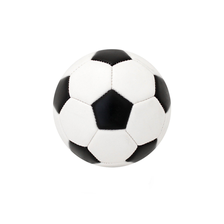

[805]
('n04254680', 'soccer_ball', 0.9999938)
('n03530642', 'honeycomb', 3.862412e-06)
('n03255030', 'dumbbell', 4.442458e-07)
('n02782093', 'balloon', 3.7038987e-07)
('n04548280', 'wall_clock', 3.143911e-07)


'_________________________________________________________'

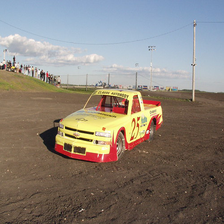

[751]
('n04037443', 'racer', 0.7131951)
('n03100240', 'convertible', 0.100896776)
('n04285008', 'sports_car', 0.0770768)
('n03930630', 'pickup', 0.02635305)
('n02704792', 'amphibian', 0.011636169)


In [ ]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML
from tensorflow.keras.applications.mobilenet import decode_predictions

IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_CHANNELS = 3

ROOT = "https://data.heatonresearch.com/data/t81-558/images/"

def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img
        
L = "_________________________________________________________"

def classify_array(images):
    for url in images:
        x = []
        ImageFile.LOAD_TRUNCATED_IMAGES = False
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        img.load()
        img = img.resize((IMAGE_WIDTH,IMAGE_HEIGHT),Image.ANTIALIAS)

        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        x = x[:,:,:,:3] # maybe an alpha channel
        pred = model.predict(x)

        display(L)
        display(img)
        print(np.argmax(pred,axis=1))

        lst = decode_predictions(pred, top=5)
        for itm in lst[0]:
            print(itm)

classify_array( [
    ROOT+"soccer_ball.jpg",
    ROOT+"race_truck.jpg"
])

In [ ]:
base_model=MobileNet(weights='imagenet',include_top=False) 
#imports the mobilenet model and discards the last 1000 neuron layer.

base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, None, None, 3)]   0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, None, None, 

In [ ]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
preds=Dense(2,activation='softmax')(x) 

In [ ]:
model=Model(inputs=base_model.input,outputs=preds)

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory('drive/MyDrive/bdbi_images',
                                                  target_size=(224, 224),
                                                  color_mode='rgb',
                                                  batch_size=1,
                                                  class_mode='categorical',
                                                  shuffle=True)

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
valid_generator = valid_datagen.flow_from_directory("drive/MyDrive/images",
                                                  target_size=(224, 224),
                                                  color_mode='rgb',
                                                  batch_size=1,
                                                  class_mode='categorical',
                                                  shuffle=True)

Found 291 images belonging to 2 classes.
Found 1250 images belonging to 5 classes.


In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',
              metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
print(type(model))
model.fit(train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=20)

<class 'tensorflow.python.keras.engine.functional.Functional'>
Epoch 1/20
291/291 [==============================] - 7s 16ms/step - loss: 2.2563 - accuracy: 0.5673
Epoch 2/20
291/291 [==============================] - 5s 17ms/step - loss: 0.6976 - accuracy: 0.6017
Epoch 3/20
291/291 [==============================] - 5s 16ms/step - loss: 0.6458 - accuracy: 0.7022
Epoch 4/20
291/291 [==============================] - 5s 16ms/step - loss: 0.6912 - accuracy: 0.5746
Epoch 5/20
291/291 [==============================] - 5s 17ms/step - loss: 0.5537 - accuracy: 0.7245
Epoch 6/20
291/291 [==============================] - 5s 17ms/step - loss: 0.5625 - accuracy: 0.7148
Epoch 7/20
291/291 [==============================] - 5s 16ms/step - loss: 0.5331 - accuracy: 0.7050
Epoch 8/20
291/291 [==============================] - 5s 16ms/step - loss: 0.6238 - accuracy: 0.6638
Epoch 9/20
291/291 [==============================] - 5s 17ms/step - loss: 0.3996 - accuracy: 0.8598
Epoch 10/20
291/291 [=======

In [ ]:
print(train_generator.class_indices)

{'desert': 0, 'farmland': 1}


In [ ]:
#predict = model.predict_generator(valid_generator)

'_________________________________________________________'

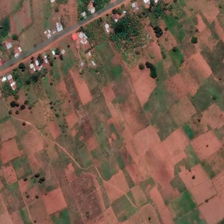

[[0.21586722 0.7841328 ]]
farmland


'_________________________________________________________'

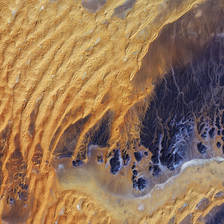

[[0.99800926 0.00199075]]
desert


'_________________________________________________________'

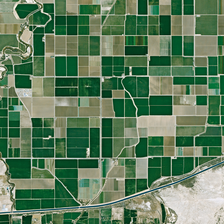

[[0.09239532 0.9076047 ]]
farmland


'_________________________________________________________'

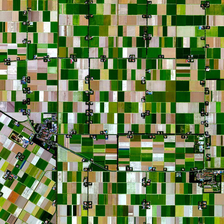

[[0.06014744 0.93985254]]
farmland


'_________________________________________________________'

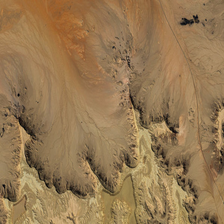

[[9.994455e-01 5.545228e-04]]
desert


'_________________________________________________________'

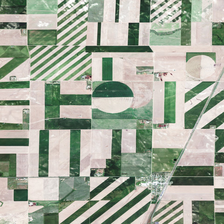

[[0.01640349 0.98359656]]
farmland


'_________________________________________________________'

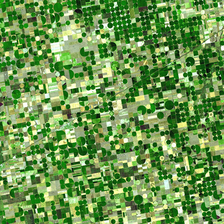

[[0.11699386 0.88300616]]
farmland


'_________________________________________________________'

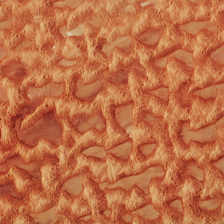

[[9.9973291e-01 2.6710183e-04]]
desert


In [ ]:
%matplotlib inline

def classify_array(images,classes):
    inv_map = {v: k for k, v in classes.items()}
    #print(images)
    for url in images:
        x = []
        ImageFile.LOAD_TRUNCATED_IMAGES = False
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        img.load()
        img = img.resize((IMAGE_WIDTH,IMAGE_HEIGHT),Image.ANTIALIAS)

        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        x = x[:,:,:,:3] # maybe an alpha channel
        
        pred = model.predict(x)

        display(L)
        display(img)
        pred2 = int(np.argmax(pred,axis=1))
        print(pred)
        print(inv_map[pred2])

input = [
    #"https://drive.google.com/file/d/1OJRwcmU5GopKLRjOb93S1kOs1NNFyGG6/view",
    #"https://raw.githubusercontent.com/gt-big-data/regional-socioeconomic/main/Platform/images/test/33.7756.png",
    #"https://drive.google.com/file/d/1OwfQjjwObgvTcTNgmQlfZ8iDErf6F01N/view?usp=sharing",
    "https://raw.githubusercontent.com/gt-big-data/regional-socioeconomic/main/Analysis/Screen%20Shot%202021-04-21%20at%205.21.21%20PM.png",
    "https://live.staticflickr.com/5610/15785865185_3cb934afca_b.jpg",
    "https://miro.medium.com/max/3840/1*0Pz2M5lUeaV2wDSY69MFOA.jpeg",
    "https://i.imgur.com/yOlhrHw.jpg",
    "https://t4.ftcdn.net/jpg/02/99/80/47/360_F_299804742_6Lpkz1GVOYagH9r2uBfvtM6ZtEPTmBti.jpg",
    "https://pbs.twimg.com/media/Do_9e-DXgAIrDbC.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Crops_Kansas_AST_20010624.jpg/1200px-Crops_Kansas_AST_20010624.jpg",
    "https://images.fineartamerica.com/images-medium-large-5/satellite-view-of-desert-in-murzuq-panoramic-images.jpg"
    ]

classify_array(input,
               train_generator.class_indices)


Validation of Model

In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
        'drive/MyDrive/images',
        target_size=(224, 224),
        color_mode='rgb',
        batch_size=1,
        class_mode=None,
        shuffle=False)

predict = model.predict_generator(test_generator)
inv_map = {v: k for k, v in train_generator.class_indices.items()}
class_to_count = {k: 0 for k, v in train_generator.class_indices.items()}
total = []
for p in predict:
  pred = int(np.argmax(p))
  class_to_count[inv_map[pred]] += 1
  total.append([p.tolist(), inv_map[pred]])
print("num images ", len(predict))
print("inv_map ", inv_map)
print("class_to_count ", class_to_count)
for i in range(len(total)):
  print("image ", i, " ", total[i])


Found 1250 images belonging to 5 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


num images  1250
inv_map  {0: 'desert', 1: 'farmland'}
class_to_count  {'desert': 615, 'farmland': 635}
image  0   [[0.3775922954082489, 0.6224076747894287], 'farmland']
image  1   [[0.9071797132492065, 0.09282032400369644], 'desert']
image  2   [[0.6449107527732849, 0.3550892770290375], 'desert']
image  3   [[0.8447701334953308, 0.1552298665046692], 'desert']
image  4   [[0.28906819224357605, 0.7109317779541016], 'farmland']
image  5   [[0.9977403879165649, 0.0022596290800720453], 'desert']
image  6   [[0.2737053334712982, 0.7262946963310242], 'farmland']
image  7   [[0.6672187447547913, 0.33278119564056396], 'desert']
image  8   [[0.36603787541389465, 0.633962094783783], 'farmland']
image  9   [[0.10546551644802094, 0.8945344686508179], 'farmland']
image  10   [[0.34712186455726624, 0.6528781652450562], 'farmland']
image  11   [[0.1258314996957779, 0.8741684556007385], 'farmland']
image  12   [[0.3589630126953125, 0.6410369873046875], 'farmland']
image  13   [[0.9985641837120056, 0.0

Algorithm

    - Farmland Weight of 1
    - Dessert Weight of -0.75

    - totalScoreForRegion = 0
    - int totalImgFor Region = 0

    - For each image
        - Run the prediction for each image
        - If farmLand
            - totalScore += (percentfarm * 1)
        - Else
            - totalScore += (percentdessert * -0.75)

        - totalImgForRegion += 1


    - weightedScore = totalScore / totalImg

In [ ]:
print(predict)

[[3.7759230e-01 6.2240767e-01]
 [9.0717971e-01 9.2820324e-02]
 [6.4491075e-01 3.5508928e-01]
 ...
 [3.1828997e-01 6.8171006e-01]
 [6.9209421e-01 3.0790579e-01]
 [9.9934810e-01 6.5186032e-04]]
